In [4]:
# from general import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos = pd.read_csv("../datos reales/percentiles_ingresos_PPA_2011.csv")

def Sintetizador(tam = 100):
    def Sintesis(ingresos):
        sintesis = 0
        for ini in range(0,100,tam):
            rango = ingresos.iloc[ini:(ini+tam)]
            peso = np.sum(rango['pop_share'])
            avg_rango = np.sum(rango['avg_welfare'] * rango['pop_share'])/peso
            sintesis += np.log(avg_rango)*peso
        return sintesis
    return Sintesis



In [5]:
datos.columns

Index(['country_code', 'year', 'reporting_level', 'welfare_type', 'percentile',
       'avg_welfare', 'pop_share', 'welfare_share', 'quantile', 'pop'],
      dtype='object')

In [9]:
datos = datos[(datos['reporting_level']=='national')]
dg = datos.groupby(['welfare_type'])
ingresos = dg.get_group('income')
consumo  = dg.get_group('consumption')

/tmp/ipykernel_42835/1183070504.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  ingresos = dg.get_group('income')
/tmp/ipykernel_42835/1183070504.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  consumo  = dg.get_group('consumption')


1100     0.501941
1101     0.778210
1102     1.043358
1103     1.275118
1104     1.440093
          ...    
1195    20.983001
1196    22.741779
1197    24.930692
1198    28.185639
1199    39.841431
Name: avg_welfare, Length: 100, dtype: float64

In [24]:
def GenerarMuestra(muestra):
    tams = list(filter(lambda x: 100%x==0, range(1,101)))
    series = [ [] for _ in range(len(tams))]
    mg = muestra.groupby(['country_code','year'])
    for grupo in mg.groups:
        sample = mg.get_group(grupo)
        if len(sample)!=100: continue
        for i in range(len(tams)):
            series[-1-i].append(Sintetizador(tams[i])(sample))
    return series

In [26]:
var_ingresos = GenerarMuestra(ingresos)
var_consumo = GenerarMuestra(consumo)

In [38]:
var_ingresos[-1]

[1.8355299378384409,
 1.9009567109026988,
 1.9676286592161372,
 4.142145224306328,
 4.283369317670984,
 1.4498403149997838,
 3.353178314264933,
 3.3714071999746897,
 3.395003829318104,
 3.318100081182422,
 3.450225143959616,
 3.4742194562186395,
 3.5772948112302125,
 3.78454388690498,
 3.7891753823588568,
 3.8580573222132815,
 3.8433760656003204,
 3.8457149543645275,
 3.676622047375641,
 3.666068191470328,
 3.6345372653391284,
 3.6328832482235653,
 3.6547189904172344,
 3.7073054983860656,
 3.683538907635476,
 3.7351756696211282,
 3.7904172061671755,
 3.7549493264299993,
 3.7696866282373307,
 3.7935683033698018,
 3.807390597150578,
 3.825749663505787,
 3.8564825425842497,
 3.828213619251379,
 3.8052032982821418,
 3.8598088345709156,
 3.8463086380967733,
 3.83178234295266,
 3.868262752322853,
 3.8798352471533426,
 3.8724801061029415,
 3.8989392953879176,
 3.8983103245206596,
 3.892920735981252,
 3.296718991342846,
 3.33651749640312,
 3.402289905494349,
 3.560988391741159,
 3.563327782379

In [50]:
simulados = pd.read_csv("../datos simulados/datos_varianzas.csv", sep='\t')

In [84]:
simulados

,-1,1,2,4,5,8,10,16,20,25,...,31250,40000,50000,62500,100000,125000,200000,250000,500000,1000000
0,1,-0.001033,-0.001033,-0.001033,-0.001033,-0.001033,-0.001033,-0.001032,-0.001032,-0.001032,...,0.003710,0.005450,0.007579,0.010438,0.020084,0.027316,0.052115,0.070831,0.185520,0.499363
1,1,-0.000790,-0.000790,-0.000789,-0.000789,-0.000789,-0.000789,-0.000789,-0.000788,-0.000788,...,0.003990,0.005716,0.007834,0.010676,0.020275,0.027487,0.052181,0.070929,0.185334,0.498693
2,1,-0.000298,-0.000298,-0.000298,-0.000297,-0.000297,-0.000297,-0.000296,-0.000296,-0.000295,...,0.004451,0.006176,0.008287,0.011130,0.020695,0.027842,0.052439,0.071108,0.185293,0.498602
3,1,-0.000715,-0.000715,-0.000715,-0.000715,-0.000715,-0.000714,-0.000714,-0.000714,-0.000714,...,0.004042,0.005773,0.007897,0.010745,0.020359,0.027547,0.052175,0.070819,0.185096,0.498508
4,1,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000015,0.000015,...,0.004689,0.006401,0.008511,0.011346,0.020918,0.028111,0.052777,0.071439,0.186060,0.500279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10,0.002082,0.002082,0.002083,0.002084,0.002087,0.002088,0.002093,0.002097,0.002101,...,0.059357,0.080438,0.106381,0.140981,0.257776,0.344245,0.636212,0.852139,2.096190,4.956040
9996,10,0.008090,0.008090,0.008090,0.008090,0.008091,0.008092,0.008094,0.008096,0.008097,...,0.066217,0.087483,0.113492,0.148358,0.265910,0.353099,0.646747,0.864348,2.116090,4.993060
9997,10,0.000454,0.000454,0.000455,0.000456,0.000457,0.000458,0.000461,0.000463,0.000466,...,0.058496,0.079753,0.105786,0.140768,0.258281,0.345524,0.639136,0.856921,2.108160,4.981680
9998,10,-0.000613,-0.000613,-0.000613,-0.000613,-0.000611,-0.000610,-0.000608,-0.000606,-0.000604,...,0.056988,0.078215,0.104243,0.139109,0.256100,0.342961,0.635852,0.852185,2.100360,4.966360


In [91]:
s10 = sg.get_group(10).to_numpy().T[1:]
s10[-1]

/tmp/ipykernel_42835/4038558702.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  s10 = sg.get_group(10).to_numpy().T[1:]


array([4.9164 , 5.02709, 4.94904, 4.97458, 4.96316, 5.05488, 4.94992,
       4.93805, 5.07188, 4.83865, 4.94447, 5.02719, 4.97783, 4.95481,
       5.05175, 4.94418, 4.91517, 4.97211, 4.91684, 4.97856, 5.03073,
       4.95542, 4.98405, 4.96857, 4.88001, 4.88933, 4.92798, 4.92419,
       4.9566 , 5.05019, 4.97203, 4.94661, 4.90786, 4.96438, 4.96164,
       4.90377, 4.95334, 5.09027, 5.04921, 5.10868, 4.95581, 5.03247,
       5.02269, 4.98607, 4.99841, 4.94522, 4.96285, 4.99323, 4.98   ,
       4.93589, 4.96108, 4.97686, 5.0236 , 4.91755, 4.97322, 4.96132,
       5.00827, 4.96066, 4.97845, 5.0103 , 4.97048, 4.89926, 5.03182,
       4.92702, 4.98466, 4.92124, 4.99316, 5.28768, 4.95071, 4.94726,
       5.0618 , 5.09456, 5.05274, 4.94884, 5.0516 , 4.95152, 5.03187,
       5.01664, 5.11736, 5.12544, 5.03177, 5.01305, 5.41026, 4.93307,
       4.94324, 5.05078, 4.87087, 4.95755, 5.05683, 5.05579, 5.00169,
       4.87819, 4.9962 , 5.02066, 4.98532, 4.97299, 4.96127, 4.94711,
       4.98071, 4.93

/tmp/ipykernel_42835/3851992495.py:15: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  Plot(sg.get_group(s2).to_numpy().T[-(len(x)):],f"$\sigma^2={s2}$")


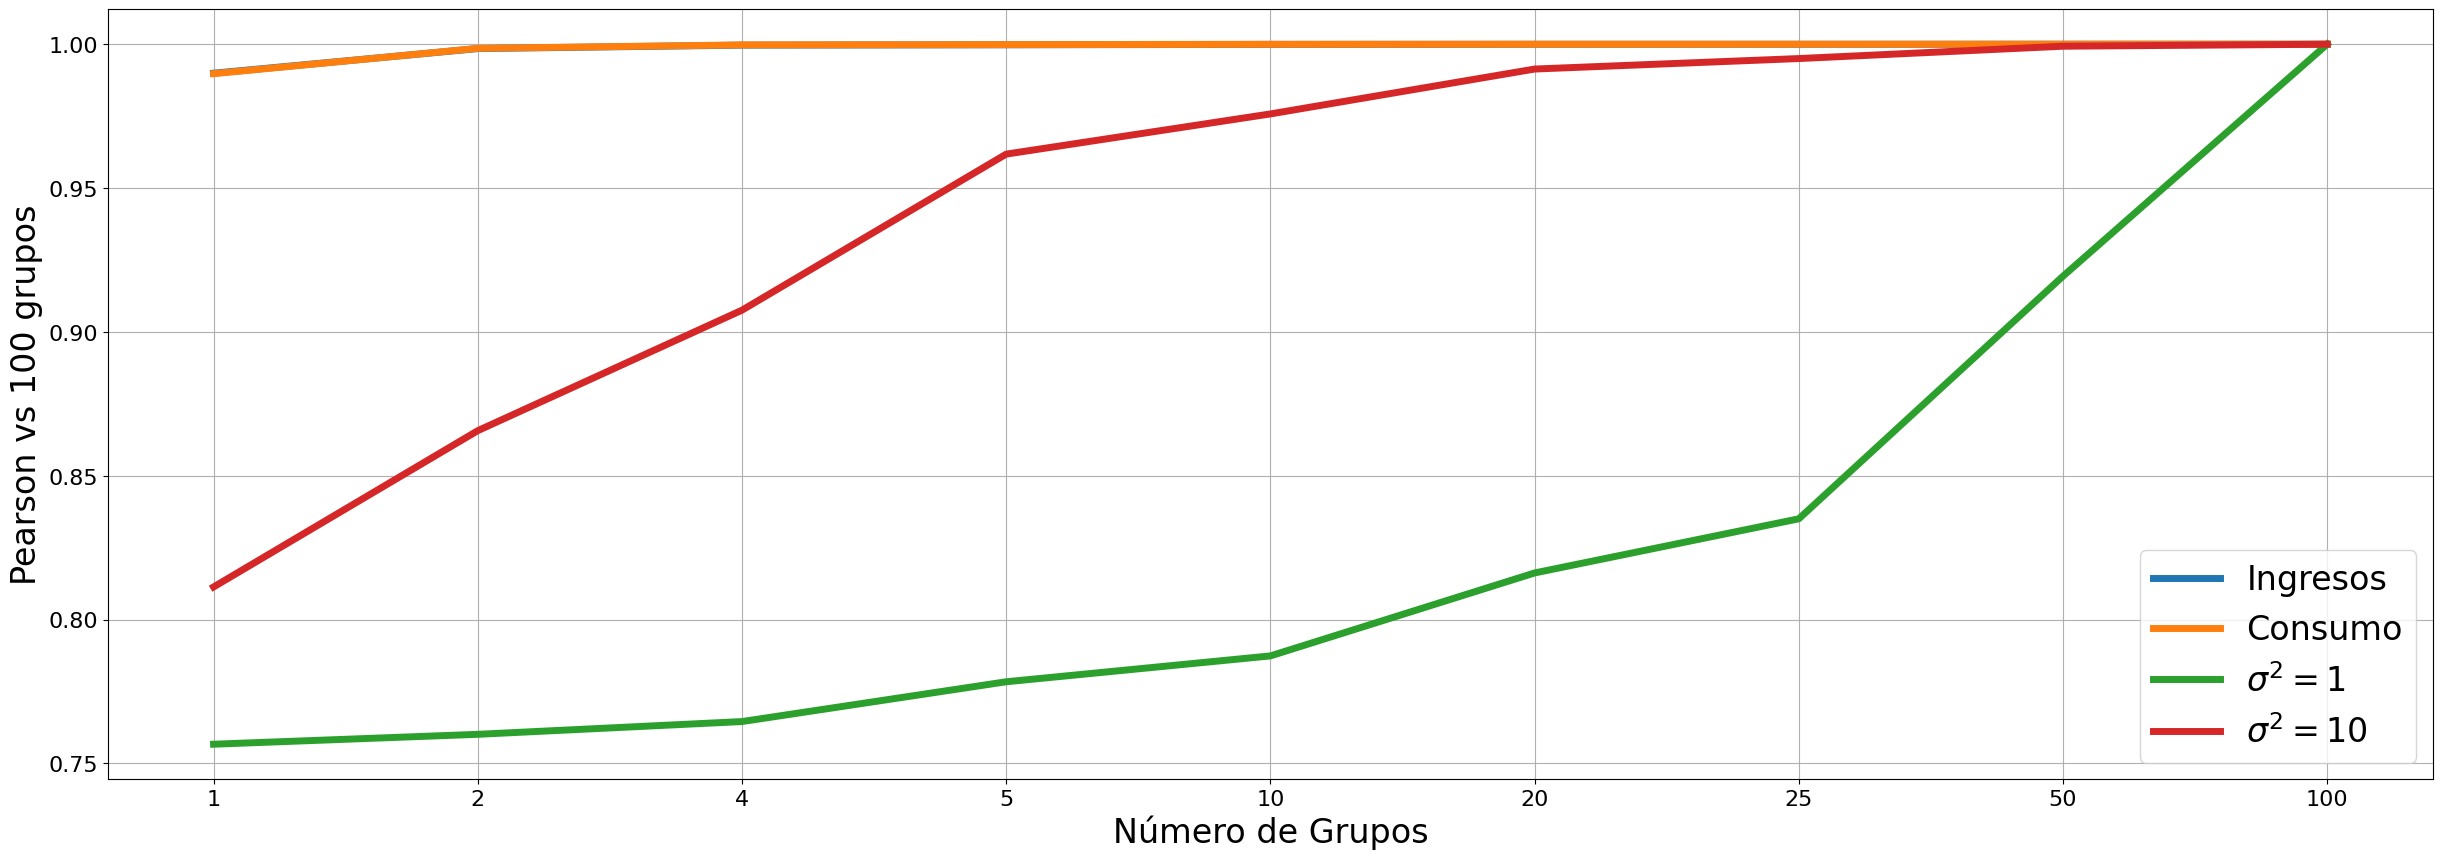

In [114]:
from scipy.stats import pearsonr

x = list(filter(lambda x : 100%x==0, range(1,101)))
x = list(map(str, x))
plt.figure(figsize=(30,10))
def Plot(y, label):
    xs = list(range(len(x)))
    ys = [pearsonr(yi,y[-1]).correlation for yi in y]
    plt.plot(xs,ys, label = label, linewidth=5)

sg = simulados.groupby(['-1'])
Plot(var_ingresos,"Ingresos")
Plot(var_consumo,"Consumo")
for s2 in [1,10]:
    Plot(sg.get_group(s2).to_numpy().T[-(len(x)):],f"$\sigma^2={s2}$")
plt.xticks(range(len(x)), x, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=24)
plt.xlabel("Número de Grupos", fontsize=24)
plt.ylabel("Pearson vs 100 grupos", fontsize=24)
plt.grid()
plt.show()


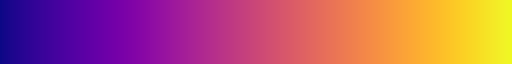

In [152]:
from matplotlib import colormaps
for colormap in colormaps:
    a = (colormaps.get(colormap))
colormaps.get("plasma")

/tmp/ipykernel_42835/1654439861.py:7: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  t = sg.get_group(s2).to_numpy().T[-(len(x)):]


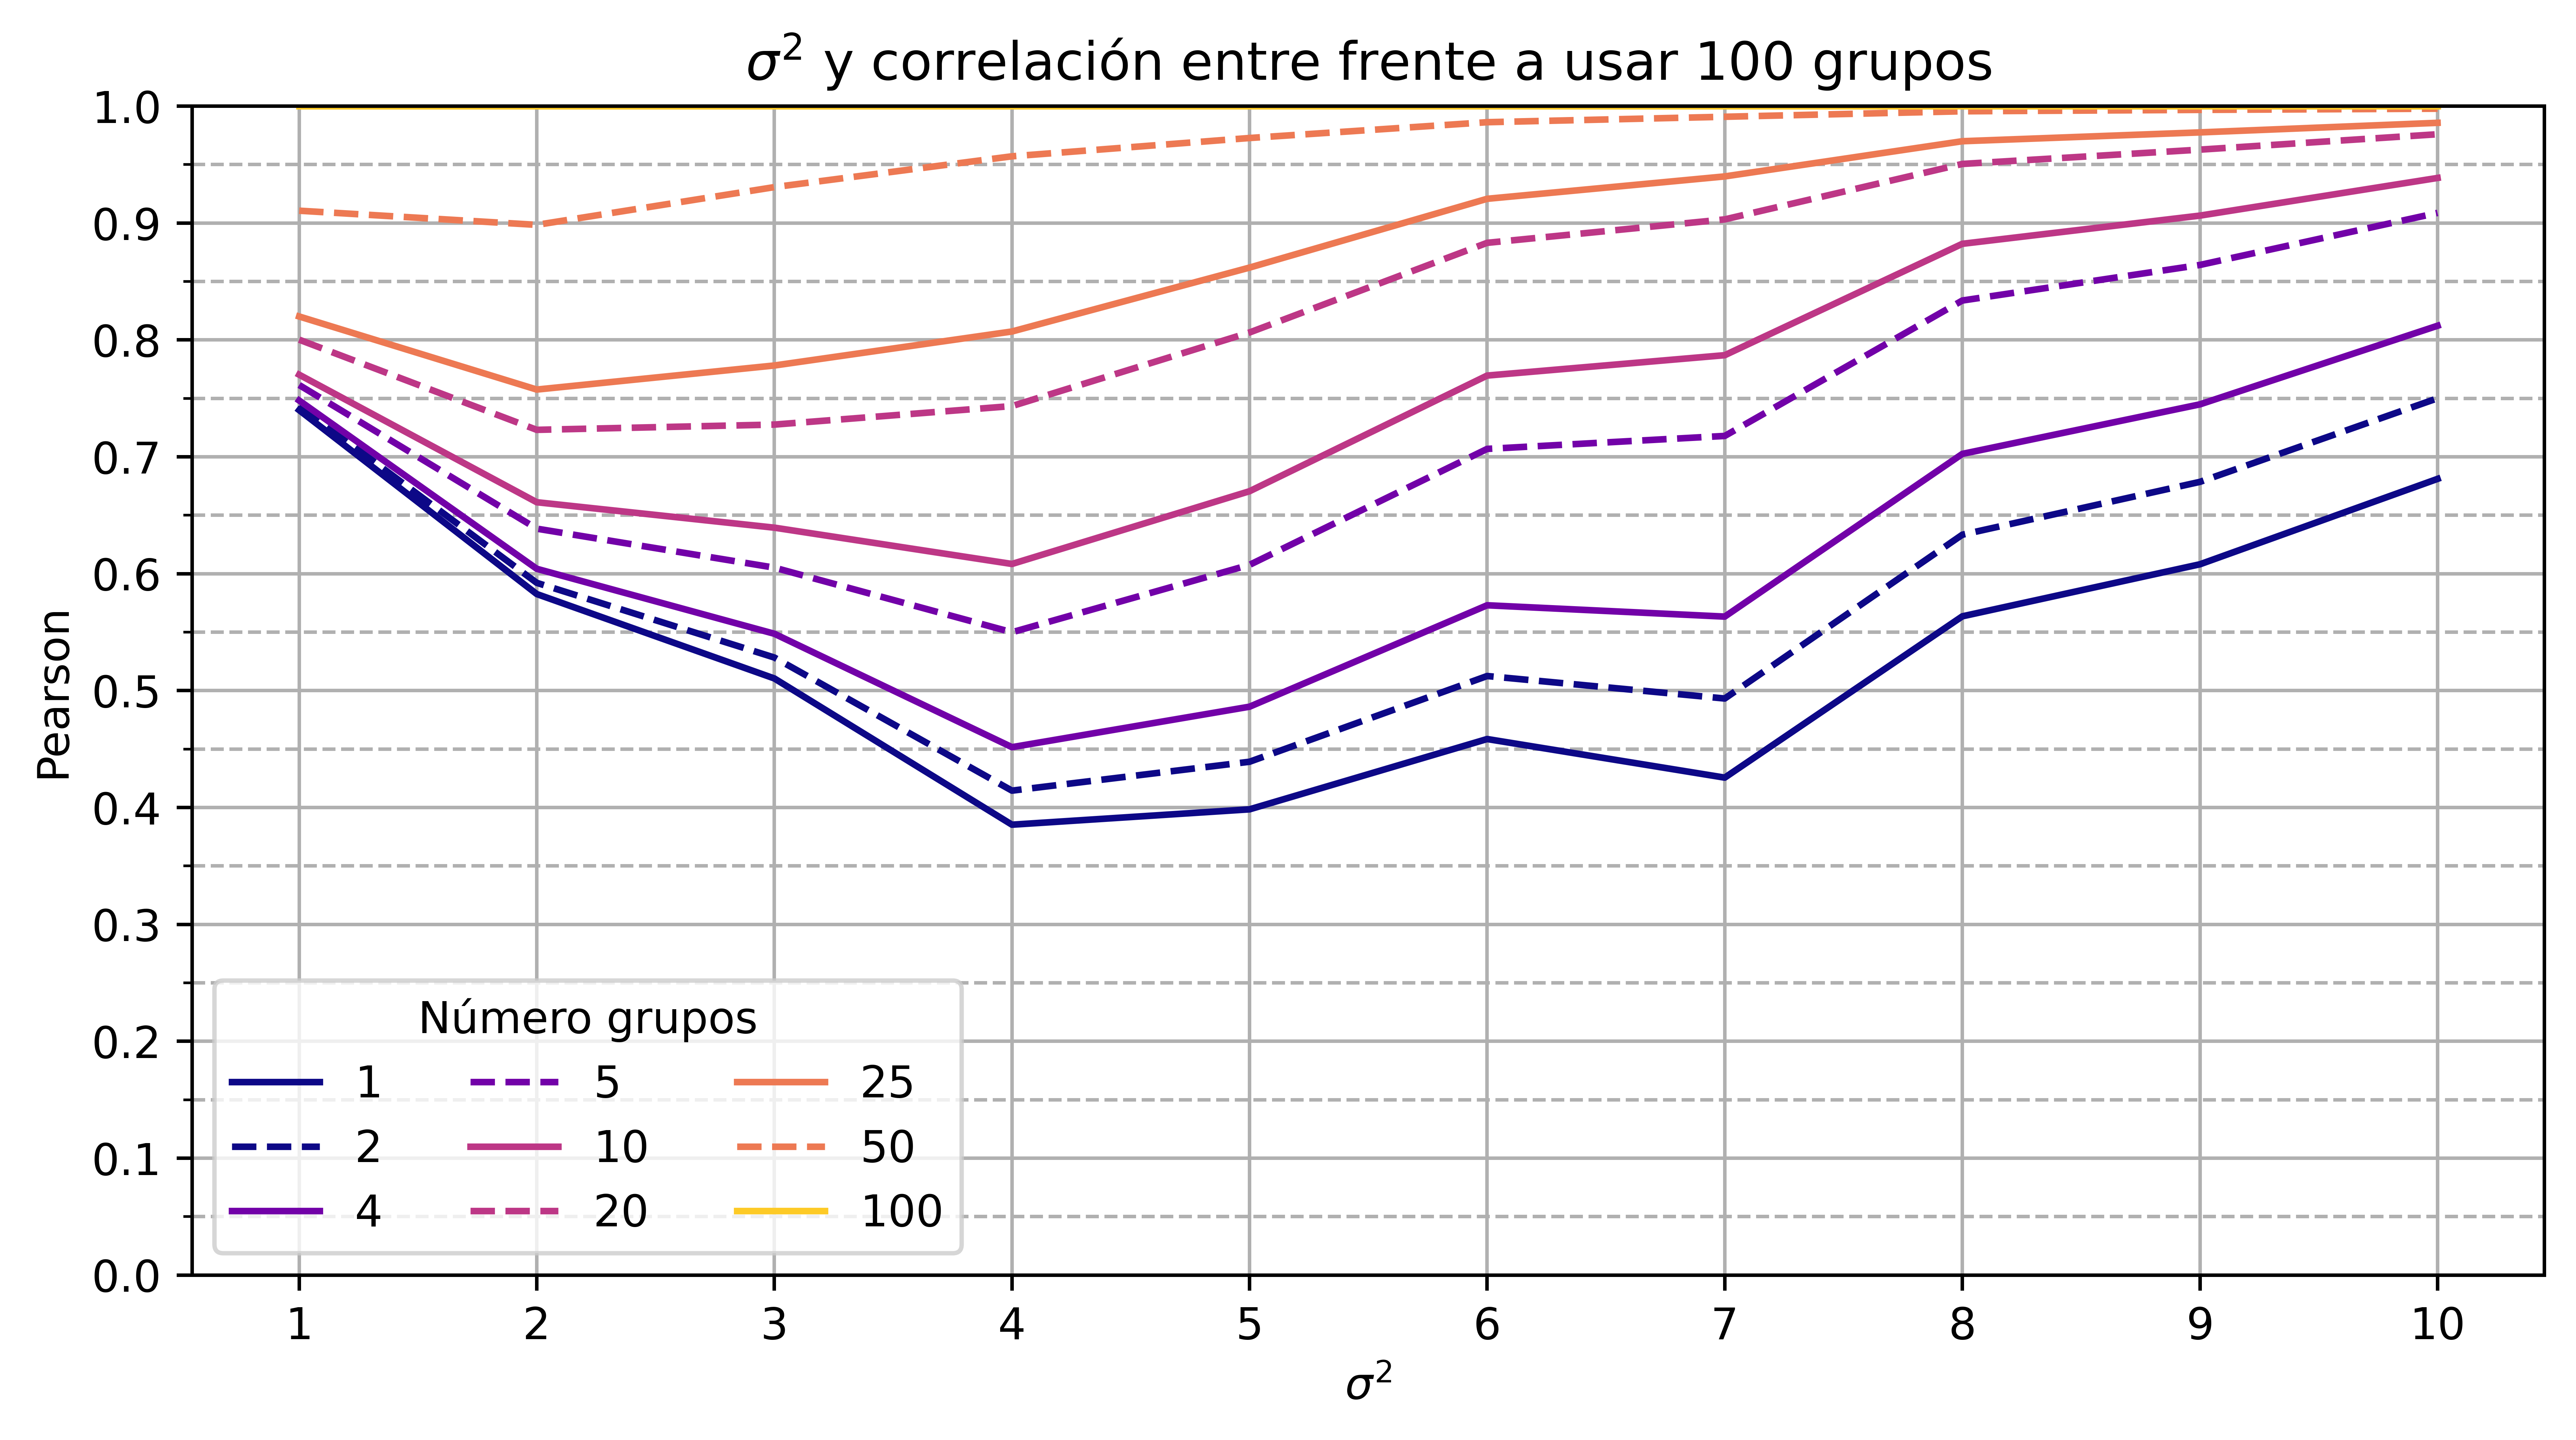

In [167]:
from scipy.stats import spearmanr
plt.figure(dpi=900, figsize=(9.6,4.8))
ng = list(filter(lambda x : 100%x==0, range(1,101)))
series = [ [] for _ in ng ]

for s2 in sg.groups:
    t = sg.get_group(s2).to_numpy().T[-(len(x)):]
    for i in range(len(ng)):
        series[i].append(spearmanr(t[i],t[-1]).correlation)

for i in range(len(ng)):
    plt.plot(sg.groups.keys(),series[i], label=f"{ng[i]}",
            c = colormaps.get("plasma")(2*(i//2)/len(ng)),
            linestyle=["-","--"][i%2])

plt.ylim(0,1)
plt.yticks(np.linspace(0,1,11), minor = False)
plt.yticks(np.linspace(0,1,21), minor = True)
plt.grid()
plt.grid(linestyle='--', which='minor')
plt.xticks(range(1,11), sg.groups.keys())
plt.xlabel("$\sigma^2$")
plt.ylabel("Pearson")
plt.legend(ncol=3, title="Número grupos")
plt.title("$\sigma^2$ y correlación entre frente a usar 100 grupos")
plt.show()